In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 56.4 MB/s eta 0:00:00


In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 850.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/cardetection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardetection


Dataset Source: https://www.kaggle.com/datasets/pkdarabi/cardetection

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

import torch

print(torch.cuda.is_available())  # باید True باشه

True


# Checking Datas

In [8]:
import os
images_dir = "car/train/images"
images = os.listdir(os.path.join(os.getcwd(), images_dir))
print("Images: ", len(images))

Images:  3530


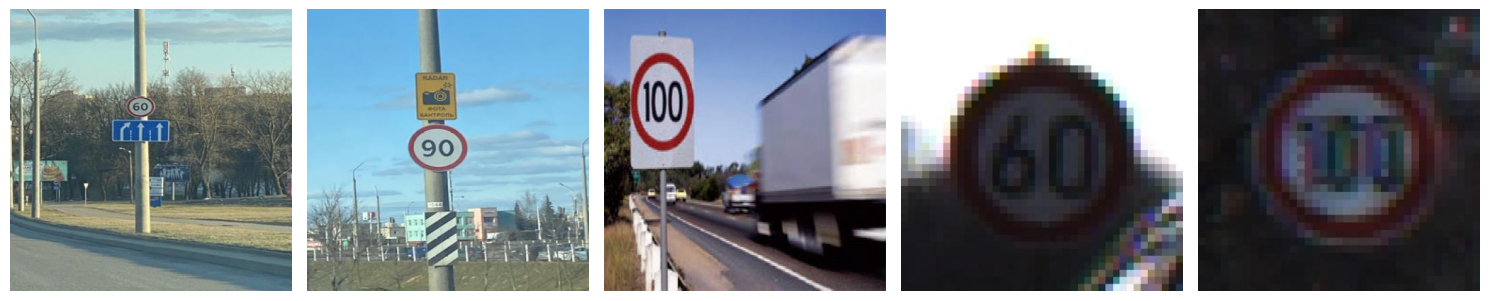

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 10))
for i, image in enumerate(images[:5]):
    image_path = os.path.join(images_dir, image)

    image = Image.open(image_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
import random
from PIL import Image

random_image = random.choice(images)
random_image_path = os.path.join(images_dir, random_image)

image = Image.open(random_image_path)

width, height = image.size
mode = image.mode

print(f"Image size: {width} x {height}")
print(f"Image mode: {mode}")


Image size: 416 x 416
Image mode: RGB


# Training Model

In [13]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [16]:
model = YOLO('yolo12n.pt')
yaml_dir = os.path.join(os.getcwd(), "car/data.yaml")


results = model.train(
    data=yaml_dir,
    epochs=30,
    batch=-1,
    optimizer = 'auto',
    device='cuda'
)

Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/content/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 102MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 327MB/s]


AMP: checks passed ✅


train: Scanning /content/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 2437.68it/s]

train: New cache created: /content/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.07G allocated, 14.57G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2570973       6.495         0.535         71.55           423        (1, 3, 640, 640)                    list
     2570973       12.99         0.759         45.58         143.1        (2, 3, 640, 640)                    list
     2570973       25.98         1.158         48.85           124        (4, 3, 640, 640)                    list
     2570973       51.96         2.114         53.27         140.4        (8, 3, 640, 640)                    list
     2570973       103.9         3.

train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 948.49it/s]


val: New cache created: /content/car/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0004453125), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      11.2G     0.8551      3.926      1.199        126        640: 100%|██████████| 62/62 [01:07<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]

                   all        801        944     0.0374      0.799       0.19      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      12.9G     0.7746      2.779      1.106        130        640: 100%|██████████| 62/62 [01:04<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]


                   all        801        944      0.291      0.418      0.322      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.9G     0.7619      2.238      1.088        131        640: 100%|██████████| 62/62 [01:03<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


                   all        801        944      0.511      0.497      0.486        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.9G     0.7586      1.917      1.086        116        640: 100%|██████████| 62/62 [01:02<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


                   all        801        944       0.59      0.558      0.601      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.9G     0.7271      1.632      1.069        135        640: 100%|██████████| 62/62 [01:04<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        801        944      0.703      0.617      0.693      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.9G      0.702      1.429      1.059        115        640: 100%|██████████| 62/62 [01:04<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        801        944      0.767      0.694      0.779      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.9G     0.6877       1.28      1.045        115        640: 100%|██████████| 62/62 [01:01<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        801        944       0.81      0.768      0.838       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.9G     0.6686      1.167      1.029        112        640: 100%|██████████| 62/62 [01:03<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]


                   all        801        944      0.843      0.701      0.817      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30        13G      0.669      1.096      1.029        113        640: 100%|██████████| 62/62 [01:03<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        801        944       0.88      0.787      0.863      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30        13G     0.6503      1.018      1.014        132        640: 100%|██████████| 62/62 [01:06<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


                   all        801        944      0.902      0.785      0.876      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30        13G     0.6261     0.9555      1.006        128        640: 100%|██████████| 62/62 [01:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        801        944       0.87      0.798       0.87      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30        13G     0.6198     0.9289      1.001        113        640: 100%|██████████| 62/62 [01:04<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        801        944      0.911      0.796      0.885      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30        13G     0.6151     0.8678     0.9969        118        640: 100%|██████████| 62/62 [01:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

                   all        801        944        0.9      0.819      0.896      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30        13G     0.6077     0.8377     0.9989        113        640: 100%|██████████| 62/62 [01:06<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]


                   all        801        944      0.904      0.828        0.9      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30        13G     0.5986     0.8114     0.9876        105        640: 100%|██████████| 62/62 [01:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        801        944      0.924      0.832      0.908      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      13.1G     0.5929     0.7813       0.99        123        640: 100%|██████████| 62/62 [01:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        801        944      0.924      0.845      0.917      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      13.1G     0.5793     0.7634     0.9833        117        640: 100%|██████████| 62/62 [01:04<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        801        944      0.954      0.827      0.917      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      13.1G     0.5671     0.7255     0.9771        118        640: 100%|██████████| 62/62 [01:05<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        801        944      0.938      0.857      0.929      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      13.1G     0.5661     0.7152     0.9748        110        640: 100%|██████████| 62/62 [01:04<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        801        944      0.947      0.852       0.93      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      13.1G     0.5627     0.6889     0.9699        119        640: 100%|██████████| 62/62 [01:02<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

                   all        801        944      0.956      0.851      0.937      0.801


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      13.1G     0.5629     0.5179     0.9451         64        640: 100%|██████████| 62/62 [01:04<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        801        944       0.93      0.864      0.936        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      13.1G     0.5528     0.4984     0.9402         71        640: 100%|██████████| 62/62 [01:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        801        944      0.943      0.868      0.934      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      13.2G     0.5461     0.4697     0.9354         63        640: 100%|██████████| 62/62 [00:59<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


                   all        801        944      0.944      0.875      0.944      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      13.2G     0.5382     0.4486       0.93         68        640: 100%|██████████| 62/62 [00:58<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        801        944      0.956       0.87      0.945      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      13.2G     0.5318     0.4326     0.9244         66        640: 100%|██████████| 62/62 [00:59<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        801        944      0.956      0.875      0.944      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      13.2G     0.5191      0.417     0.9183         66        640: 100%|██████████| 62/62 [01:01<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        801        944      0.955      0.884      0.951      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      13.2G     0.5124     0.4055     0.9179         67        640: 100%|██████████| 62/62 [00:59<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        801        944       0.95      0.881      0.956      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      13.2G     0.5006     0.3877     0.9108         67        640: 100%|██████████| 62/62 [01:00<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        801        944      0.955      0.874      0.957      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      13.2G     0.4928      0.373     0.9081         66        640: 100%|██████████| 62/62 [01:00<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


                   all        801        944      0.961      0.882      0.957      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      13.3G     0.4883     0.3647     0.9018         70        640: 100%|██████████| 62/62 [01:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        801        944      0.968      0.895      0.962      0.832



30 epochs completed in 0.608 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,559,653 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]


                   all        801        944      0.968      0.895      0.962      0.833
           Green Light         87        122      0.911      0.754      0.859       0.51
             Red Light         74        108      0.914      0.691      0.839       0.53
       Speed Limit 100         52         52      0.985      0.942      0.992      0.895
       Speed Limit 110         17         17      0.979      0.941       0.99      0.912
       Speed Limit 120         60         60          1      0.947      0.994      0.913
        Speed Limit 20         56         56      0.999      0.982      0.986      0.883
        Speed Limit 30         71         74      0.969      0.959      0.985       0.92
        Speed Limit 40         53         55      0.964      0.981       0.99      0.879
        Speed Limit 50         68         71      0.979      0.873      0.974       0.88
        Speed Limit 60         76         76      0.965      0.921      0.966      0.878
        Speed Limit 7

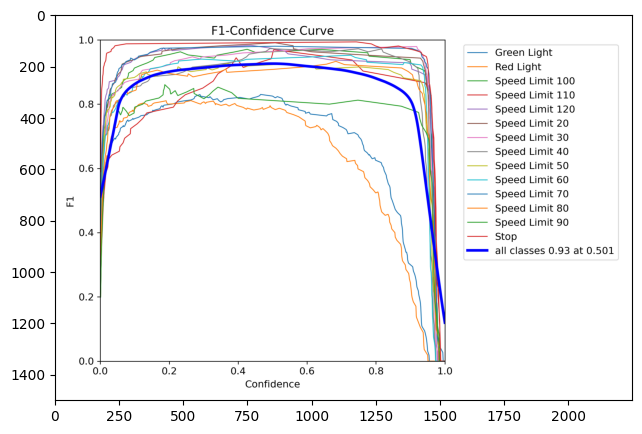

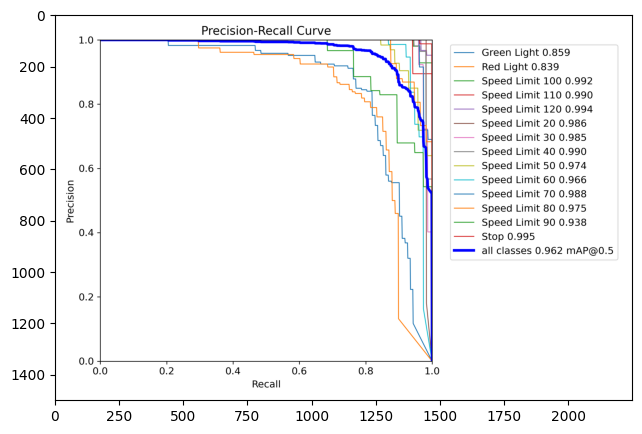

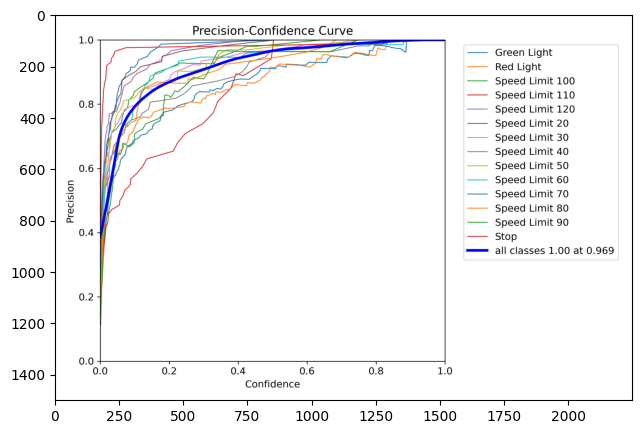

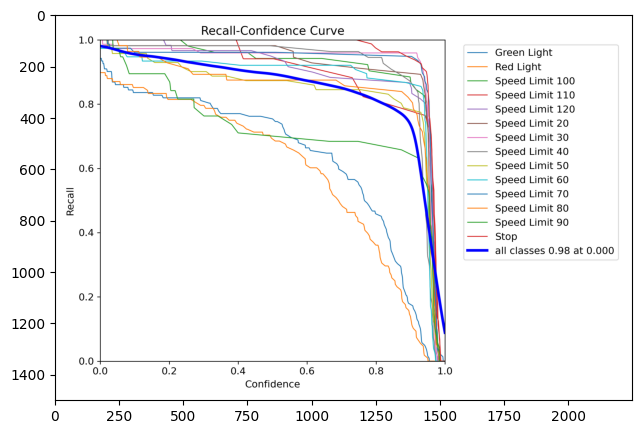

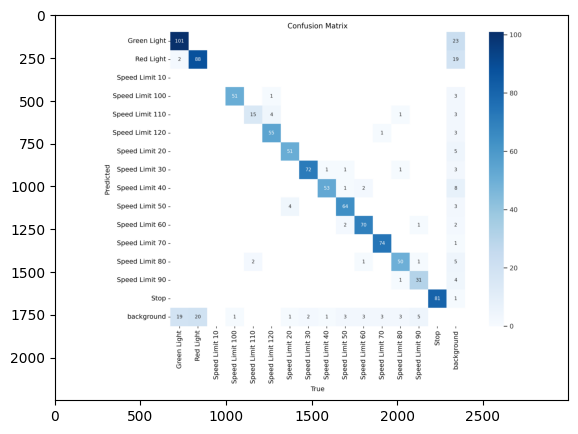

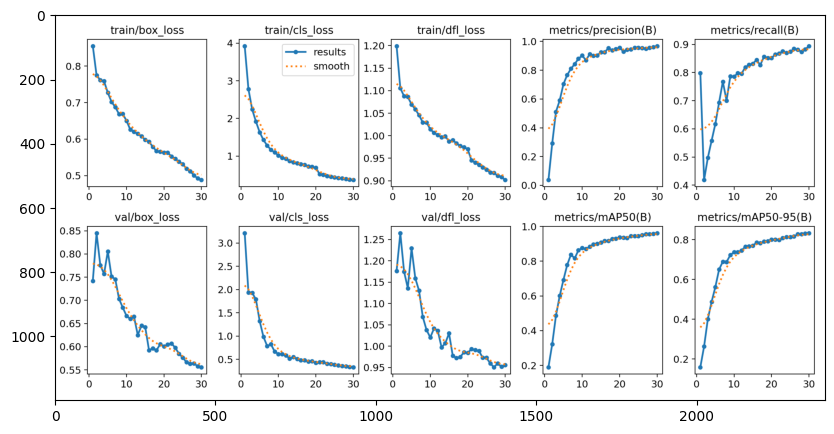

In [20]:
path = "runs/detect/train3"
path = os.path.join(os.getcwd(), path)

result_images = [
    "F1_curve.png",
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "results.png"
]



for r in result_images:
  r_path = os.path.join(path, r)

  image = Image.open(r_path)

  plt.figure(figsize=(10, 5))
  plt.imshow(image)
  plt.show()

# Testing Model

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os, random
import numpy as np
import cv2

In [11]:
model = YOLO('best.pt')

In [17]:
path = "Data/car/test/images"
path = os.path.join(os.getcwd(), path)

images = os.listdir(path)
random_image = random.choice(images)

image_path = os.path.join(path, random_image)
image = cv2.imread(image_path).astype(np.uint8)


result = model.predict(source=image)


0: 640x640 1 Speed Limit 20, 135.6ms
Speed: 9.1ms preprocess, 135.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


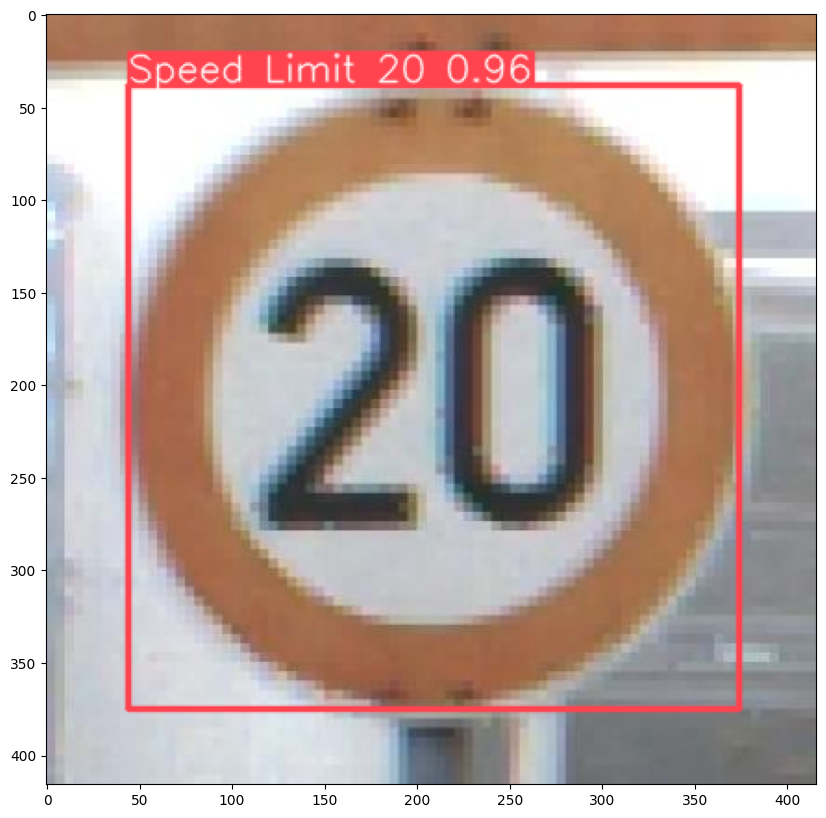

In [18]:
r_img = result[0].plot()

r_img = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(r_img)
plt.show()